# Motif marginal effect in the upstream of PER1 region

**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


**Check input file**

In [2]:
fdiry = file.path(FD_RES, "annotation_fragment")
fname = "target_PER1.bed.gz"
fglob = file.path(fdiry, "*", fname)
system(paste("ls -lh", fglob), intern = TRUE)

[1] "-rw-rw-r-- 1 kk319 reddylab 3.1M Sep 23 23:04 /home/mount/work/out/proj_combeffect/annotation_fragment/Input1_20x/target_PER1.bed.gz"
 [2] "-rw-rw-r-- 1 kk319 reddylab 187K Sep 23 23:04 /home/mount/work/out/proj_combeffect/annotation_fragment/Input1/target_PER1.bed.gz"    
 [3] "-rw-rw-r-- 1 kk319 reddylab 3.0M Sep 23 23:05 /home/mount/work/out/proj_combeffect/annotation_fragment/Input2_20x/target_PER1.bed.gz"
 [4] "-rw-rw-r-- 1 kk319 reddylab 218K Sep 23 23:05 /home/mount/work/out/proj_combeffect/annotation_fragment/Input2/target_PER1.bed.gz"    
 [5] "-rw-rw-r-- 1 kk319 reddylab 3.1M Sep 23 23:06 /home/mount/work/out/proj_combeffect/annotation_fragment/Input3_20x/target_PER1.bed.gz"
 [6] "-rw-rw-r-- 1 kk319 reddylab 280K Sep 23 23:06 /home/mount/work/out/proj_combeffect/annotation_fragment/Input3/target_PER1.bed.gz"    
 [7] "-rw-rw-r-- 1 kk319 reddylab 3.4M Sep 23 23:07 /home/mount/work/out/proj_combeffect/annotation_fragment/Input4_20x/target_PER1.bed.gz"
 [8] "-rw-rw-r-- 1 kk319 reddylab 199K Sep 23 23:07 /home/mount/work/out/proj_combeffect/annotation_fragment/Input4/target_PER1.bed.gz"    
 [9] "-rw-rw-r-- 1 kk319 reddylab 2.9M Sep 23 23:08 /home/mount/work/out/proj_combeffect/annotation_fragment/Input5_20x/target_PER1.bed.gz"
[10] "-rw-rw-r-- 1 kk319 reddylab 150K Sep 23 23:08 /home/mount/work/out/proj_combeffect/annotation_fragment/Input5/target_PER1.bed.gz"    
[11] "-rw-rw-r-- 1 kk319 reddylab 1.9M Sep 23 23:09 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX2_Dex/target_PER1.bed.gz"  
[12] "-rw-rw-r-- 1 kk319 reddylab 769K Sep 23 23:09 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX2_DMSO/target_PER1.bed.gz" 
[13] "-rw-rw-r-- 1 kk319 reddylab 1.3M Sep 23 23:10 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX3_Dex/target_PER1.bed.gz"  
[14] "-rw-rw-r-- 1 kk319 reddylab 524K Sep 23 23:10 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX3_DMSO/target_PER1.bed.gz" 
[15] "-rw-rw-r-- 1 kk319 reddylab 1.7M Sep 23 23:11 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX4_Dex/target_PER1.bed.gz"  
[16] "-rw-rw-r-- 1 kk319 reddylab 545K Sep 23 23:11 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX4_DMSO/target_PER1.bed.gz" 
[17] "-rw-rw-r-- 1 kk319 reddylab 2.0M Sep 23 23:12 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX5_Dex/target_PER1.bed.gz"  
[18] "-rw-rw-r-- 1 kk319 reddylab 681K Sep 23 23:12 /home/mount/work/out/proj_combeffect/annotation_fragment/TFX5_DMSO/target_PER1.bed.gz"

**Check environment**

In [3]:
detectCores()

[1] 56

In [4]:
mem_used()

76.9 MB

## Import annotated fragment

In [5]:
###################################################
# Import annotated fragments
###################################################

### set column names and types
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(),
           col_character(), col_double(),  col_integer())
cnames = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag",
           "Chrom_MTF",  "Start_MTF",  "End_MTF",
           "Motif", "Score", "Overlap")

### set samples
SAMPLES = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

### import bed files for each sample 
fdiry = file.path(FD_RES, "annotation_fragment")
fname = "target_PER1.bed.gz"

lst_dat = lapply(SAMPLES, function(sam){
    ### set path
    fpath = file.path(fdiry, sam, fname)
    print(fpath); flush.console()
    
    ### import data
    dat = read_tsv(fpath, col_types=ctypes, col_names=cnames) %>% mutate(Sample = sam)
    return(dat)
})

### arrange data
dat_ann_frag = bind_rows(lst_dat)

### check environment (before release variables)
print(mem_used())
lst_dat = NULL

### check environment (after release variables)
print(mem_used())

[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input1/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input2/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input3/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input4/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input5/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input1_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input2_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input3_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input4_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/Input5_20x/target_PER1.bed.gz"
[1] "/home/mount/work/out/proj_combeffect/annotation_fragment/TFX2_DMSO/target_PER1.bed.gz

In [6]:
head(dat_ann_frag)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_MTF,Start_MTF,End_MTF,Motif,Score,Overlap,Sample
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
chr17,8148117,8149012,1,chr17,8148107,8148124,KLF/SP/2,9.0318,7,Input1
chr17,8148117,8149012,1,chr17,8148109,8148121,INSM1,6.1647,4,Input1
chr17,8148117,8149012,1,chr17,8148109,8148129,GC-tract,8.3277,12,Input1
chr17,8148117,8149012,1,chr17,8148123,8148133,GLI,7.4318,10,Input1
chr17,8148117,8149012,1,chr17,8148124,8148139,NR/17,7.8649,15,Input1
chr17,8148117,8149012,1,chr17,8148126,8148137,KLF/SP/1,11.3678,11,Input1


## Import library size

In [7]:
###################################################
# Import library size
###################################################

### Helper function to get
get_group = function(idn_sample){
    idn = idn_sample
    
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    
    idn = str_remove(
        string = idn, 
        pattern = "_20x")
    
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

### set path
fdiry = file.path(FD_RES, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

### import library size
ctypes = c(col_integer(), col_character())
cnames = c("Size", "FPath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)

### remove the total size
dat_lib = dat_lib %>% dplyr::filter(FPath != "total")

### summarize info from the file path
### stackoverflow: Extract only folder name right before filename from full path
dat_lib = dat_lib %>% 
    #mutate(Sample = tools::file_path_sans_ext(basename(FPath))) %>%
    mutate(Sample = basename(dirname(FPath))) %>%
    mutate(Group = get_group(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
dat_lib

Size,Sample,Group
<dbl>,<chr>,<chr>
371718546,Input1_20x,Input
18666630,Input1,Input
347635732,Input2_20x,Input
20167924,Input2,Input
349994051,Input3_20x,Input
23280988,Input3,Input
413508358,Input4_20x,Input
19003938,Input4,Input
341110487,Input5_20x,Input


## Preprocess
* Filter: at least 10 fragments for a motif
* Filter: fully cover the motif

### EDA: Filter: fully cover the motif

In [33]:
dat = dat_ann_frag
dat = dat %>% 
    mutate(Length_MTF = End_MTF - Start_MTF) %>%
    mutate(Length_Dif = Length_MTF - Overlap)

head(dat)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Chrom_MTF,Start_MTF,End_MTF,Motif,Score,Overlap,Sample,Length_MTF,Length_Dif
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr17,8148117,8149012,1,chr17,8148107,8148124,KLF/SP/2,9.0318,7,Input1,17,10
chr17,8148117,8149012,1,chr17,8148109,8148121,INSM1,6.1647,4,Input1,12,8
chr17,8148117,8149012,1,chr17,8148109,8148129,GC-tract,8.3277,12,Input1,20,8
chr17,8148117,8149012,1,chr17,8148123,8148133,GLI,7.4318,10,Input1,10,0
chr17,8148117,8149012,1,chr17,8148124,8148139,NR/17,7.8649,15,Input1,15,0
chr17,8148117,8149012,1,chr17,8148126,8148137,KLF/SP/1,11.3678,11,Input1,11,0


In [9]:
table(dat$Length_Dif)


      0       1       2       3       4       5       6       7       8       9 
5817178   11378   11258   11169   10746   11123   10583    9990    9403    9022 
     10      11      12      13      14      15      16      17      18      19 
   8099    6988    6592    5483    4496    4068    3511    2904    2343    1834 
     20      21      22      23      24      25      26      27      28      29 
   1401    1376    1121     893     823     716     532     507     431     386 
     30      31      32      33      34      35      36      37      38      39 
    321     294     249     199     234     232     218     180     131     175 
     40      41      42      43      44      45      46      47      48      49 
    136     134     107     145     125      76      73      83      56      61 
     50      51      52      53      54      55      56      57      58      59 
     48      77      58      63      39      22      35      35      25      26 
     60      61      62    

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 8 rows containing missing values (geom_bar).”


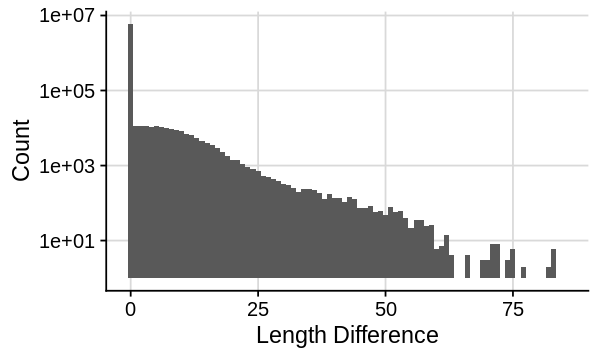

In [10]:
gpt = ggplot(dat, aes(x=Length_Dif)) + 
    geom_histogram(binwidth = 1) + 
    labs(x = "Length Difference", y = "Count") +
    scale_y_log10() +
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

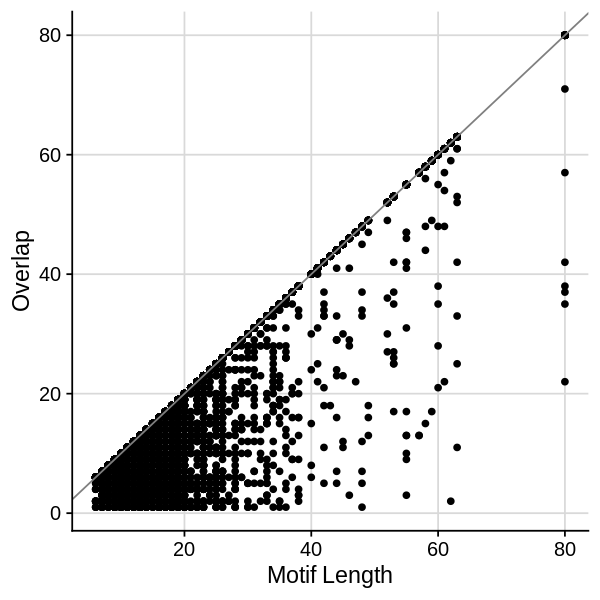

In [11]:
set.seed(123)
tmp = dat %>% dplyr::sample_n(100000)
gpt = ggplot(tmp, aes(x=Length_MTF, y=Overlap)) + 
    geom_point() + 
    geom_abline(slope = 1, intercept = 0, color="grey50") +
    labs(x = "Motif Length", y = "Overlap") +
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [30]:
library(RColorBrewer)

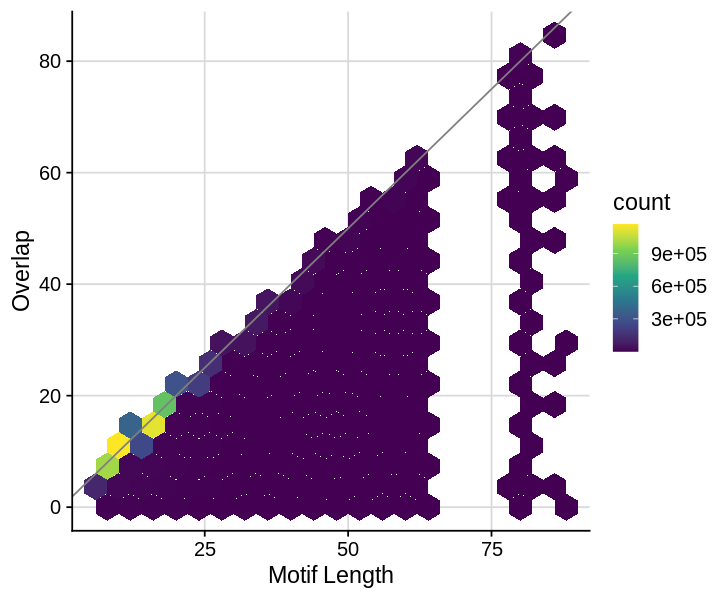

In [39]:
set.seed(123)
tmp = dat #%>% dplyr::sample_n(10000000)
gpt = ggplot(tmp, aes(x=Length_MTF, y=Overlap)) + 
    geom_hex(bins = 20) + 
    geom_abline(slope = 1, intercept = 0, color="grey50") +
    scale_fill_viridis_c() +
    labs(x = "Motif Length", y = "Overlap") +
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

### Filter

In [22]:
###################################################
# Preprocess
###################################################
cat("+++++ Preprocess +++++\n")

### Filter: fully cover the motif
dat = dat_ann_frag
dat = dat %>% 
    mutate(Length_MTF = End_MTF - Start_MTF) %>%
    mutate(Length_Dif = Length_MTF - Overlap)

cat("Filtering: fully cover the motif\n")
cat("    Before Filter:", "#Motif =", length(unique(dat$Motif)), "#Annot =", nrow(dat), "\n")
dat = dat %>% dplyr::filter(Length_Dif == 0)
cat("    After  Filter:", "#Motif =", length(unique(dat$Motif)), "#Annot =", nrow(dat), "\n")

### grouped by motif cluster and 
### split the annotated fragments into list
lst    = dat %>% group_by(Motif) %>% group_split
motifs = lapply(lst, function(x){unique(x$Motif)}) %>% unlist
names(lst) = motifs

### get the list
lst_frag = lapply(lst, function(dat){
    tmp = dat %>% 
        group_by(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Motif, Sample) %>%
        summarize(N_Motif = n(), .groups = 'drop')
    return(tmp)
})

### filter out motifs that have almost no/low fragment in total
#THRESHOLD = 10
#cat("Filtering: filter out motifs with low fragments\n")
#cat("    Threshold:", THRESHOLD, "\n")
#cat("    Before Filter:", "#Motif =", length(lst_frag), "\n")

#lst = lst_frag
#cnt = lapply(lst, function(dat){sum(dat$Count_Frag)})
#lst = lst[cnt > 10]
#lst_frag = lst

#cat("    After  Filter:", "#Motif =", length(lst_frag), "\n")

+++++ Preprocess +++++
Filtering: fully cover the motif
    Before Filter: #Motif = 240 #Annot = 5970091 
    After  Filter: #Motif = 240 #Annot = 5817178 


In [24]:
lst = lst_frag
cnt = lapply(lst, function(dat){sum(dat$Count_Frag)})

### EDA: filter motif with no fragment

In [25]:
summary(unlist(cnt))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    505    6671   15589   16145   25136   34642 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



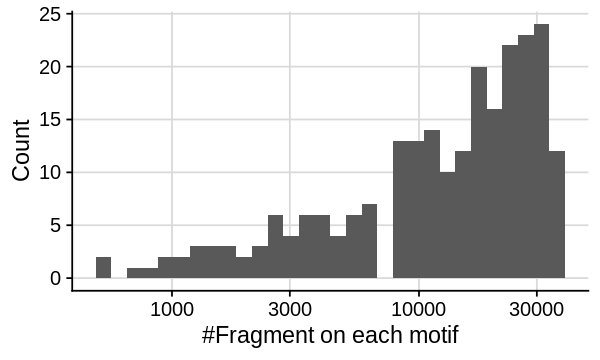

In [26]:
options(repr.plot.height=3, repr.plot.width=5)
qplot(x=unlist(cnt)) + 
    scale_x_log10() + 
    labs(x="#Fragment on each motif", y="Count") +
    theme_cowplot() + 
    background_grid()

## Cofounding factors

In [40]:
head(names(lst_frag))

[1] "AHR"    "AIRE"   "AP1/1"  "AP1/2"  "BATF"   "BCL6/1"

In [41]:
dat = lst_frag[["NR/20"]]
head(dat)

Chrom_Frag,Start_Frag,End_Frag,Count_Frag,Motif,Sample,N_Motif
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
chr17,8149103,8150289,1,NR/20,Input4_20x,1
chr17,8149107,8150370,1,NR/20,Input1_20x,1
chr17,8149107,8150372,1,NR/20,Input1_20x,1
chr17,8149162,8150259,1,NR/20,Input1_20x,1
chr17,8149162,8150259,1,NR/20,Input2_20x,1
chr17,8149162,8150259,1,NR/20,Input4_20x,1


In [42]:
table(dat$N_Motif)


   1    2 
9122 4881 

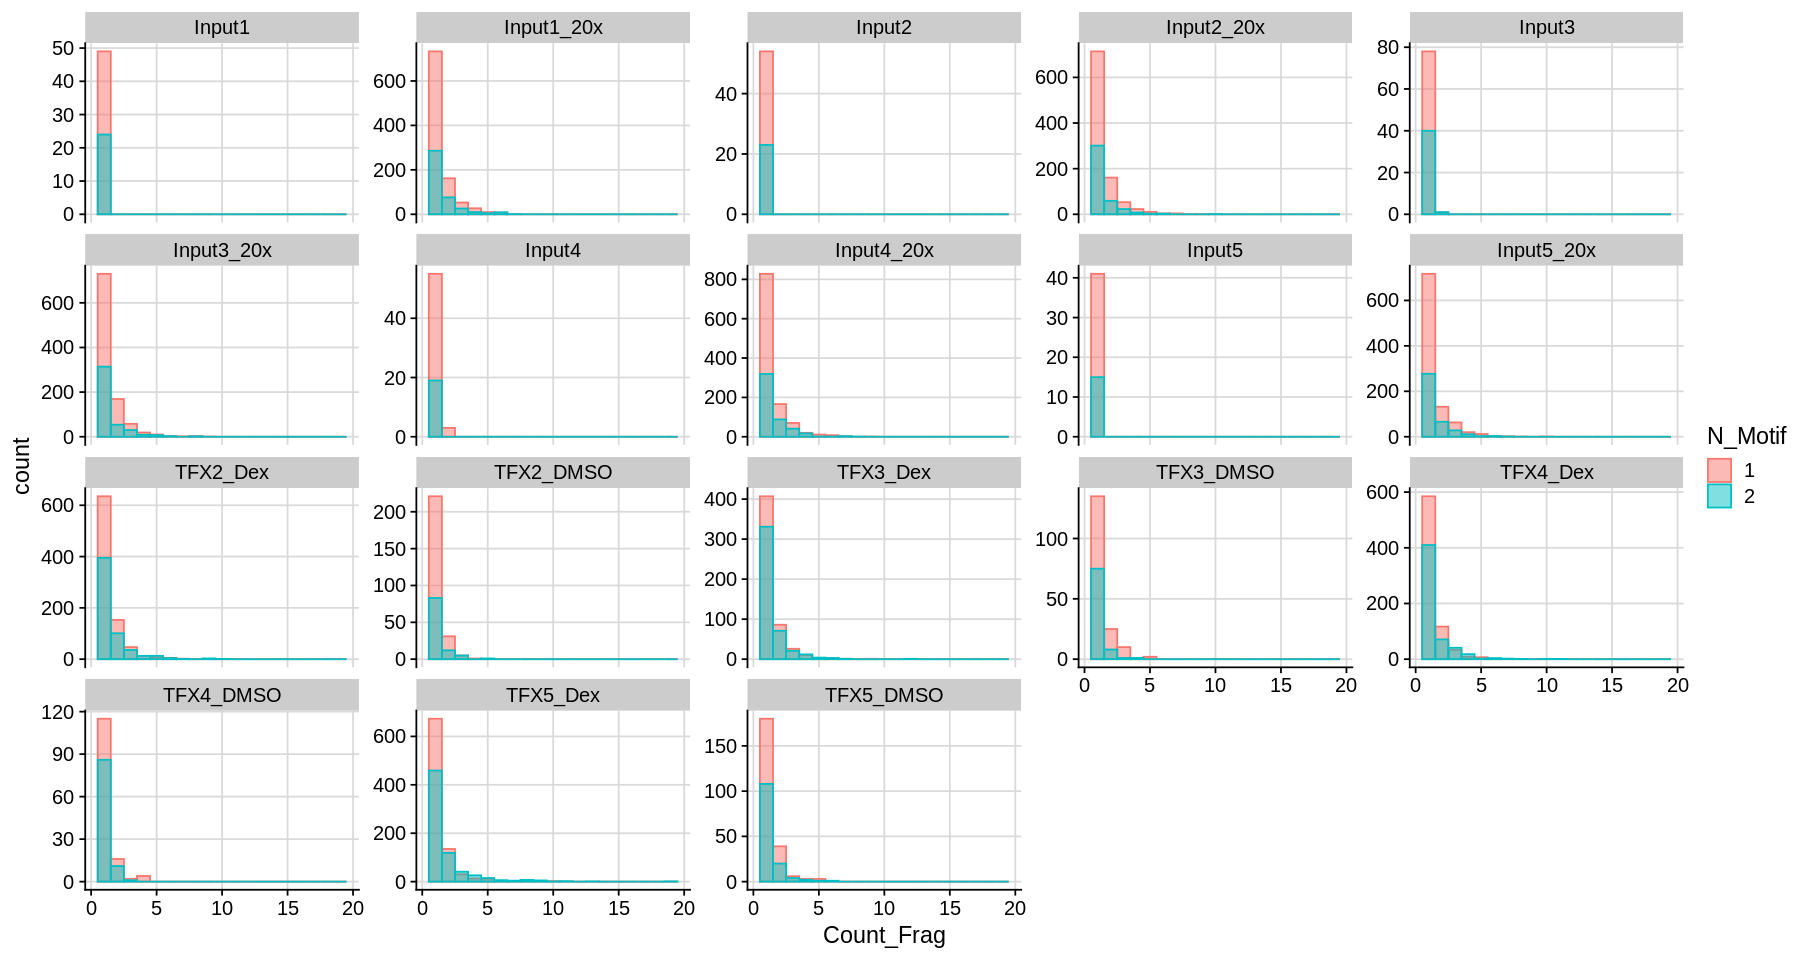

In [47]:
options(repr.plot.height=8, repr.plot.width=15)
tmp = dat %>% mutate(N_Motif = as.character(N_Motif))
gpt = ggplot(tmp, aes(x=Count_Frag, group=N_Motif, color=N_Motif, fill=N_Motif)) + 
    geom_histogram(binwidth=1, alpha=0.5, position = 'identity') +
    #scale_y_log10() +
    #expand_limits(y=0) +
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Sample, scale="free_y")
print(gpt)

## Set up linear model

In [ ]:
### set samples
SAMPLES0 = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES1 = c(
    paste0("Input", 1:5),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

SAMPLES2 = c(
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

In [ ]:
### Helper function
### https://win-vector.com/2014/05/30/trimming-the-fat-from-glm-models-in-r/
stripGlmLR = function(cm) {
  cm$y = c()
  cm$model = c()
  
  cm$residuals = c()
  cm$fitted.values = c()
  cm$effects = c()
  cm$qr$qr = c()  
  cm$linear.predictors = c()
  cm$weights = c()
  cm$prior.weights = c()
  cm$data = c()

  cm$family$variance = c()
  cm$family$dev.resids = c()
  cm$family$aic = c()
  cm$family$validmu = c()
  cm$family$simulate = c()
  attr(cm$terms,".Environment") = c()
  attr(cm$formula,".Environment") = c()
  
  return(cm)
}

**RUN**

In [ ]:
names(lst_frag)

In [ ]:
### start
#registerDoParallel(10)
timer_start = Sys.time()

lst_tmp = lst_frag #head(lst_frag, 10)
lst_tmp = foreach(idn = names(lst_tmp), .combine = append) %do% {
    ### set environment
    require(tidyverse)
    
    ### extract
    dat = lst_tmp[[idn]]
    
    ### get fragments
    dat = dat %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct()

    ### count
    dat = dat %>% group_by(Sample) %>% summarise(Value = sum(Count_Frag))
    
    ### choose
    dat = dat %>% dplyr::filter(Sample %in% SAMPLES2)
    
    ### normalize counts by library size
    dat = dat %>% left_join(dat_lib, by="Sample")
    dat = dat %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size)) %>%
        mutate(X = Group)

    ### create design matrix
    idxs  = c("Input", "TFX_DMSO", "TFX_Dex")
    dat$X = factor(dat$X, levels=idxs)
    X = model.matrix(~X, dat)
    X[,"XTFX_DMSO"] = X[,"XTFX_DMSO"] + X[,"XTFX_Dex"]
    y = dat$Norm_Value

    ### fit model and get the summary
    fit = lm(y ~ X + 0)
    res = summary(fit)
    
    ### reduce the memory size
    res = stripGlmLR(res)
    
    ### arrange
    lst = list()
    lst[[idn]] = list()
    lst[[idn]]$res = res
    lst[[idn]]$cnt = dat
    lst[[idn]]$X   = X
    lst[[idn]]$y   = y
    
    ### store the results
    fdiry = file.path(FD_RES, "model_linear", "target_PER1")
    fname = str_replace(idn, pattern = "/", replacement = "_")
    fpath = file.path(fdiry, fname)
    saveRDS(lst, fpath)
    idn
}

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

## Compare old input and new input (deeper)

In [ ]:
### start
#registerDoParallel(10)
timer_start = Sys.time()

###
lst_tmp     = lst_frag #head(lst_frag, 10)
lst_res_old = foreach(idn = names(lst_tmp), .combine = append) %do% {
    ### set environment
    require(tidyverse)
    
    ### extract
    dat = lst_tmp[[idn]]
    
    ### get fragments
    dat = dat %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct()

    ### count
    dat = dat %>% group_by(Sample) %>% summarise(Value = sum(Count_Frag))
    
    ### choose
    dat = dat %>% dplyr::filter(Sample %in% SAMPLES1)
    
    ### normalize counts by library size
    dat = dat %>% left_join(dat_lib, by="Sample")
    dat = dat %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size)) %>%
        mutate(X = Group)

    ### create design matrix
    idxs  = c("Input", "TFX_DMSO", "TFX_Dex")
    dat$X = factor(dat$X, levels=idxs)
    X = model.matrix(~X, dat)
    X[,"XTFX_DMSO"] = X[,"XTFX_DMSO"] + X[,"XTFX_Dex"]
    y = dat$Norm_Value

    ### fit model and get the summary
    fit = lm(y ~ X + 0)
    res = summary(fit)
    
    ### reduce the memory size
    res = stripGlmLR(res)
    
    ### arrange
    lst = list()
    lst[[idn]] = res
    #lst[[idn]] = list()
    #lst[[idn]]$res = res
    #lst[[idn]]$cnt = dat
    #lst[[idn]]$X   = X
    #lst[[idn]]$y   = y
    lst
}

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

In [ ]:
### start
#registerDoParallel(10)
timer_start = Sys.time()

###
lst_tmp     = lst_frag #head(lst_frag, 10)
lst_res_new = foreach(idn = names(lst_tmp), .combine = append) %do% {
    ### set environment
    require(tidyverse)
    
    ### extract
    dat = lst_tmp[[idn]]
    
    ### get fragments
    dat = dat %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct()

    ### count
    dat = dat %>% group_by(Sample) %>% summarise(Value = sum(Count_Frag))
    
    ### choose
    dat = dat %>% dplyr::filter(Sample %in% SAMPLES2)
    
    ### normalize counts by library size
    dat = dat %>% left_join(dat_lib, by="Sample")
    dat = dat %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size)) %>%
        mutate(X = Group)

    ### create design matrix
    idxs  = c("Input", "TFX_DMSO", "TFX_Dex")
    dat$X = factor(dat$X, levels=idxs)
    X = model.matrix(~X, dat)
    X[,"XTFX_DMSO"] = X[,"XTFX_DMSO"] + X[,"XTFX_Dex"]
    y = dat$Norm_Value

    ### fit model and get the summary
    fit = lm(y ~ X + 0)
    res = summary(fit)
    
    ### reduce the memory size
    res = stripGlmLR(res)
    
    ### arrange
    lst = list()
    lst[[idn]] = res
    #lst[[idn]] = list()
    #lst[[idn]]$res = res
    #lst[[idn]]$cnt = dat
    #lst[[idn]]$X   = X
    #lst[[idn]]$y   = y
    lst
}

### print end message
timer = Sys.time()
cat("Done!\n")
print(timer - timer_start)

## Visualize

In [ ]:
fun = function(motifs){
    res = sapply(motifs, function(motif){
        if (motif == "NR/20"){ return("red") }
        if (motif == "AP1/1"){ return("blue") }
        return("grey50")
    })
    return(res)
}

In [ ]:
lst_dat = list(lst_res_old, lst_res_new)
lst_dat = lapply(lst_dat, function(lst_res){
    ###
    lst = lapply(names(lst_res), function(mtf){
        res = lst_res[[mtf]]
        dat = as.data.frame(coef(res))
        dat = rownames_to_column(dat, var="X")
        dat$Motif = mtf
        return(dat)
    })
    
    ###
    dat = bind_rows(lst)
    dat = dat %>% dplyr::filter(str_detect(X, "Intercept", negate = TRUE))
    dat$Color = fun(dat$Motif)
    dat$X = factor(dat$X, levels=c("XXTFX_DMSO", "XXTFX_Dex"))
    return(dat)
})

In [ ]:
lst_dat = lapply(lst_dat, function(dat){
    dat$adj_pval = p.adjust(dat$`Pr(>|t|)`, method = "BH")
    return(dat)
})

In [ ]:
head(lst_dat[[1]])

In [ ]:
lst_gpt = lapply(lst_dat, function(dat){
    gpt = ggplot(dat, aes(x=Estimate, y=-log10(`Pr(>|t|)`))) + 
        geom_point(size=0.7, color=dat$Color) + 
        geom_hline(yintercept = 2, color="red", alpha=0.5) +
        labs(x="Estimate", y="-log10(adj. p-value (BH))") +
        theme_bw() + 
        facet_wrap(~X)
    return(gpt)
})
lst_gpt[[1]] = lst_gpt[[1]] + ggtitle("Old Input")
lst_gpt[[2]] = lst_gpt[[2]] + ggtitle("New Input (Deeper)")

In [ ]:
options(repr.plot.height=7, repr.plot.width=8)
grid.arrange(grobs = lst_gpt, ncol = 1)

In [1]:
options(repr.plot.height=7, repr.plot.width=8)
grid.arrange(grobs = lst_gpt, ncol = 1)

ERROR: Error in grid.arrange(grobs = lst_gpt, ncol = 1): could not find function "grid.arrange"
